In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
single_image = x_train[0]

In [ ]:
single_image.shape

(28, 28)

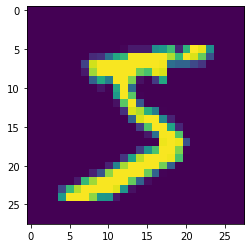

In [ ]:
plt.imshow(single_image)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_example = to_categorical(y_train)
y_example.shape

(60000, 10)

In [ ]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [ ]:
y_cat_train = to_categorical(y_train,10)

In [ ]:
single_image.max()

255

In [ ]:
single_image.min()

0

In [ ]:
x_train = x_train/255

In [ ]:
x_test = x_test/255

In [ ]:
scaled_image = x_train[0]

In [ ]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

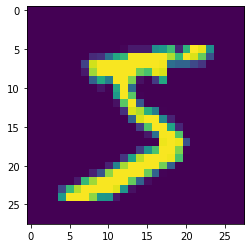

In [ ]:
plt.imshow(scaled_image)

In [ ]:
#batch size,width,height,color channel
x_train = x_train.reshape(60000,28,28,1)

In [ ]:
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
model = Sequential()
model.add((Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu')))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [ ]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1369 - accuracy: 0.9598 - val_loss: 0.0488 - val_accuracy: 0.9853
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0416 - val_accuracy: 0.9874
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.0358 - val_accuracy: 0.9878
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0209 - accuracy: 0.9934 - val_loss: 0.0421 - val_accuracy: 0.9873


In [ ]:
metrics = pd.DataFrame(model.history.history)

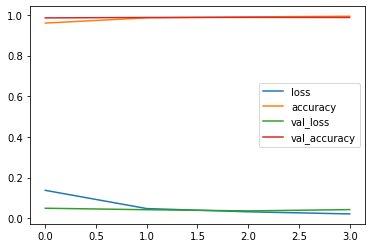

In [ ]:
metrics.plot()

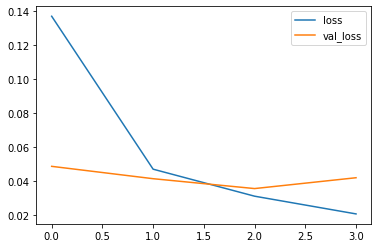

In [ ]:
metrics[['loss','val_loss']].plot()

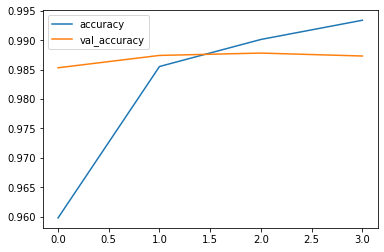

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.04212569445371628, 0.9872999787330627]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
confusion_matrix(y_test,predictions)

array([[ 977,    0,    0,    1,    0,    0,    1,    0,    1,    0],
       [   0, 1116,    2,    2,    1,    0,    2,    1,   11,    0],
       [   0,    0, 1017,    4,    0,    0,    1,    5,    4,    1],
       [   0,    0,    1, 1006,    0,    1,    0,    0,    2,    0],
       [   0,    0,    0,    0,  972,    0,    1,    0,    1,    8],
       [   2,    0,    0,    9,    0,  877,    1,    0,    3,    0],
       [   5,    1,    0,    1,    1,    4,  942,    0,    4,    0],
       [   0,    2,    7,    3,    0,    0,    0, 1009,    1,    6],
       [   3,    0,    0,    2,    0,    0,    1,    0,  967,    1],
       [   1,    1,    0,    4,    5,    2,    0,    3,    3,  990]])

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


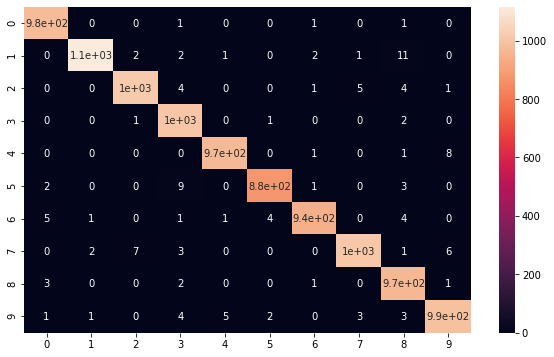

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [ ]:
my_number = x_test[0]

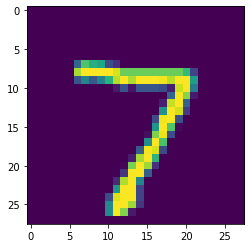

In [ ]:
plt.imshow(my_number.reshape(28,28))

In [ ]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])